<p style="text-align: center;"><img src="http://www.ucm.es/logo/ucm.png" alt="ucm" style="height: 100px;"/>   <img src="https://www.ucm.es/data/cont/media/www/pag-18458/logo_aocg.jpg" alt="aocg" style="height: 100px;"/> 

&nbsp;

<div align="center"> 
<font size=5> Universidad Complutense de Madrid</font>
</div>
    
<div align="center"> 
<font size=4> Grupo Computense de Óptica Aplicada </font>
</div>
&nbsp;

&nbsp;



    
<div align="center"> 
<font size=6> Axi_FSDL: Definición de la lente </font>
</div>

- **Para**: Posible paper de axis-FSDL

- **Fecha**: 2023/05/10

- **Objetivos**: - Script para definición de lente $f(r,\theta)=f_1(r)f_2(\theta)$

- **Descripción** - 

- **Referencias**: 
  - [1] Angela Soria-Garcia, Luis Miguel Sanchez-Brea, Jesus del Hoyo, Francisco Jose Torcal-Milla, Jose Antonio Gomez-Pedrero "Fourier series diffractive lens with extended depth of focus" Optics & Laser Technology, Volume 164,109491, 2023, ISSN 0030-3992, https://doi.org/10.1016/j.optlastec.2023.109491.

- **Autores**: 
  - Luis Miguel Sánchez Brea
    




# Introducción

En 

# Desarrollo 

Conviene explicar bien lo que se hace en los júpyter

In [25]:
%load_ext autoreload
%autoreload 2



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
import numpy as np
from matplotlib import rcParams



rcParams['figure.dpi'] = 150  #dpi
rcParams['axes.linewidth'] = 1.5
rcParams['axes.formatter.useoffset'] = False
rcParams['font.size'] = 14
rcParams['axes.labelsize'] = 14


In [27]:
import matplotlib
import matplotlib.cm as cm

from diffractio import degrees, mm, plt, sp, um, np
from diffractio.scalar_fields_XY import Scalar_field_XY
from diffractio.utils_drawing import draw_several_fields
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_sources_XY import Scalar_source_XY

from py_aocg.angular_lens import Angular_lens

## Uso

In [28]:
wavelength = 0.6328*um
radius=2*mm

focal=250*mm
num_periods=64
delta_f=25*mm


x = np.linspace(-radius, radius, 512)
y = np.linspace(-radius, radius, 512)

radius_out=400*um
x_out = np.linspace(-radius_out, radius_out, 128)
z_out = np.linspace(25*mm,
                    2 * focal + 4 * delta_f / 2,
                    128)
y_out = np.linspace(-radius_out, radius_out, 128)


In [29]:
t1 = Scalar_mask_XY(x, y, wavelength, info='FZP')
t2 = Scalar_mask_XY(x, y, wavelength, info='lens')
t3 = Angular_lens(x, y, wavelength, info='axicon')
t4 = Angular_lens(x, y, wavelength, info='FSDL')
t5 = Angular_lens(x, y, wavelength, info='axicon-lens')
t6 = Angular_lens(x, y, wavelength, info='axi-lens')


In [30]:
t1.fresnel_lens(r0=(0,0), kind='phase', phase=np.pi, radius=radius, focal=focal)
t1.draw('phase')

In [31]:
t2.lens(r0=(0, 0), radius=radius, focal=focal)
t2.draw('phase')

In [45]:
t3.lens_axi_fourier(
                      r0=(0, 0),
                      radius=radius,
                      focal=focal,
                      delta_f=delta_f,
                      num_periods=num_periods,
                      coefs_radius=np.array([[0], [1]]),
                      coefs_fourier=np.array([[0, 1], [1, 0]]),
                      binarize=False,
                      angle=0 * degrees,
                      mask=True,
                      verbose=False)

t3.draw('phase')

In [33]:
t4.lens_fourier(r0=(0, 0),
                    radius=radius,
                    focal=focal,
                    delta_f=delta_f,
                    num_periods=num_periods,
                    coefs=np.array([[0, 1], [1, 1]]),
                    binarize=False,
                    angle=0 * degrees,
                    mask=True,
                    verbose=False)

t4.draw('phase')

In [34]:
t5.lens_axi_fourier(r0=(0, 0),
                      radius=radius,
                      focal=focal,
                      delta_f=delta_f,
                      num_periods=num_periods,
                      coefs_radius=np.array([[1], [1]]),
                      coefs_fourier=np.array([[0, 1], [1, 1]]),
                      binarize=False,
                      angle=0 * degrees,
                      mask=True,
                      verbose=False)

t5.draw('phase')

In [35]:
t6.lens_axi_fourier(r0=(0, 0),
                    radius=radius,
                    focal=focal,
                    delta_f=delta_f,
                    num_periods=num_periods,
                    coefs_radius=np.array([[0, 1, 2], [0.25, 1, .25]]),
                    coefs_fourier=np.array([[0, 1], [1, 1]]),
                    binarize=False,
                    angle=0 * degrees,
                    mask=True,
                    verbose=False)

t6.draw('phase')

In [36]:
names = ('FZP', 'lens', 'axicon', 'FSDL', 'axicon-lens', 'axilens')
masks = (t1, t2, t3, t4, t5, t6)
fields = []

num x, num y, num z = 128, 128, 1
num x, num y, num z = 128, 128, 1
num x, num y, num z = 128, 128, 1
num x, num y, num z = 128, 128, 1
num x, num y, num z = 128, 128, 1
num x, num y, num z = 128, 128, 1


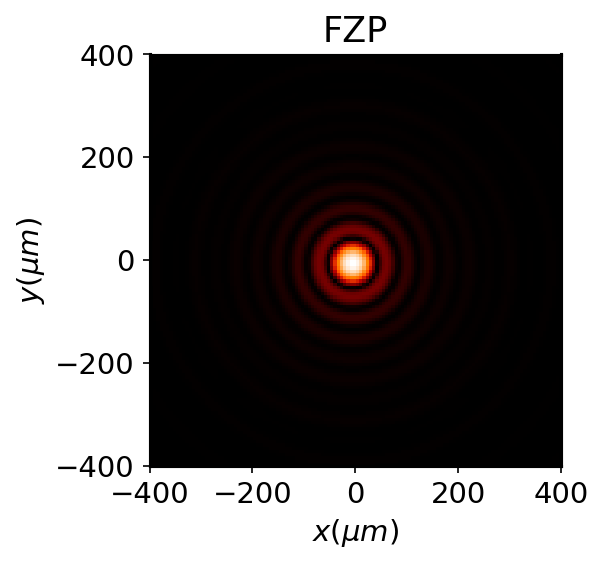

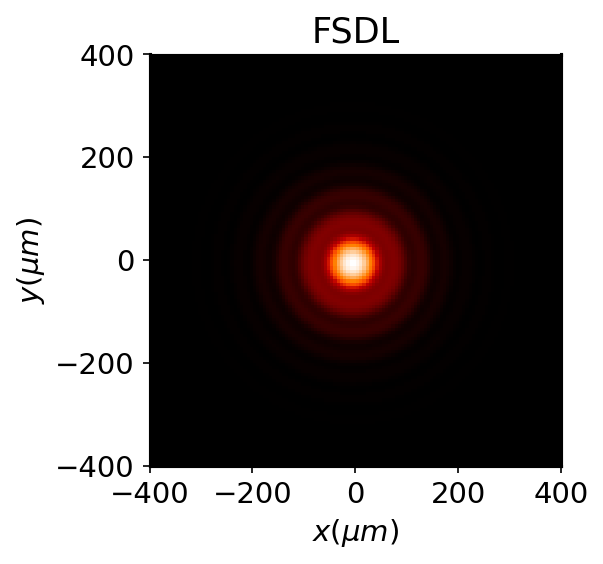

In [37]:
for t, name in zip(masks, names):
    u1 = t.CZT(focal, xout=x_out, yout=y_out, verbose=True)
    u1.draw(logarithm=1e-1)
    plt.title(name)
    fields.append(u1)

num x, num y, num z = 128, 128, 1


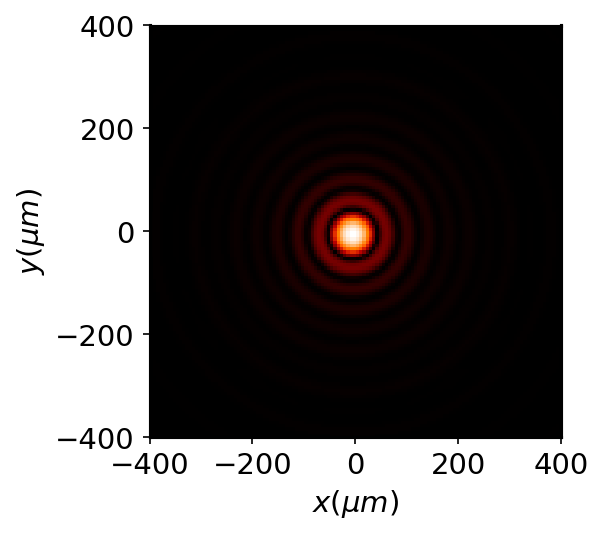

In [38]:
u1=t1.CZT(focal, xout=x_out, yout=y_out, verbose=True)
u1.draw(logarithm=1e-1)

FZP        :  num x, num y, num z = 128, 1, 128
lens       :  num x, num y, num z = 128, 1, 128
axicon     :  num x, num y, num z = 128, 1, 128
FSDL       :  num x, num y, num z = 128, 1, 128
axicon-lens:  num x, num y, num z = 128, 1, 128
axilens    :  num x, num y, num z = 128, 1, 128


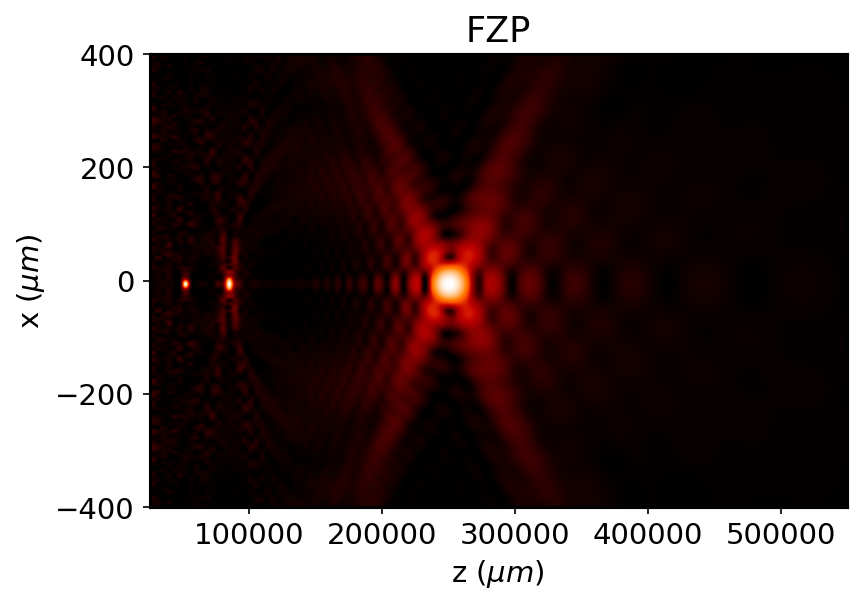

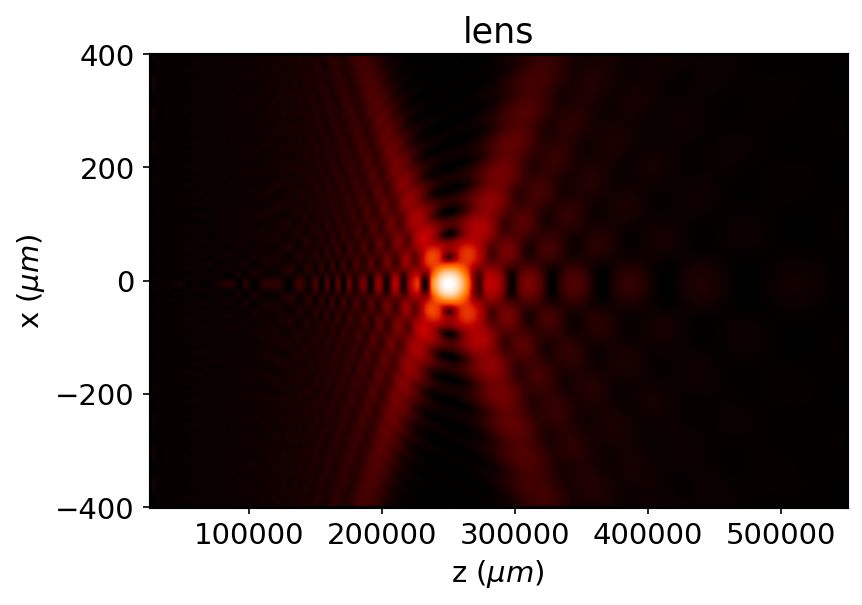

In [39]:
for t, name in zip(masks, names):
    print("{:11}".format(name), end=':  ')
    u1 = t.CZT(z=z_out, xout=x_out, yout=0, verbose=True)
    u1.draw(logarithm=1e-1)
    plt.title(name)
    fields.append(u1)